## Softmax 

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt

from data import read_data_sets
from nn import Softmax
from tools import train


def experiment(initial_rate, T, lam, regularization,
               epoch_min, epoch_max, early_stopping):
    # Annealing
    def rate(t):
        return initial_rate / (1 + t / T)
    
    # Train
    dss = read_data_sets(one_hot=True)
    print('Training set size:', dss.train.size)
    print('Hold-out set size:', dss.validation.size)
    print('Test set size:', dss.test.size)
    results = train(Softmax, dss, rate=rate,
                    lam=lam, regularization=regularization,
                    epoch_min=epoch_min, epoch_max=epoch_max,
                    early_stopping=early_stopping)
    
    # Plot    
    results.plot_loss_function()
    plt.savefig('figs/softmax_E.pdf')
    plt.ylim(0, 2)
    plt.savefig('figs/softmax_E_zoom.pdf')
    plt.plot()
    
    results.plot_percent_correct()
    plt.savefig('figs/softmax_c.pdf')
    plt.ylim(0.8, 1)
    plt.savefig('figs/softmax_c_zoom.pdf')
    plt.plot()
    
    return results

Training set size: 18000
Hold-out set size: 2000
Test set size: 2000


/Users/qobilidop/Dropbox/CSE-253-PA/1/nn.py:64: RuntimeWarning: overflow encountered in exp
  exp = np.exp(z)
/Users/qobilidop/Dropbox/CSE-253-PA/1/nn.py:65: RuntimeWarning: invalid value encountered in true_divide
  return exp / np.expand_dims(exp.sum(axis=1), axis=1)
/Users/qobilidop/Dropbox/CSE-253-PA/1/nn.py:72: RuntimeWarning: invalid value encountered in less
  y[y < threshold] = threshold


CPU times: user 8min 29s, sys: 1min 42s, total: 10min 12s
Wall time: 5min 16s


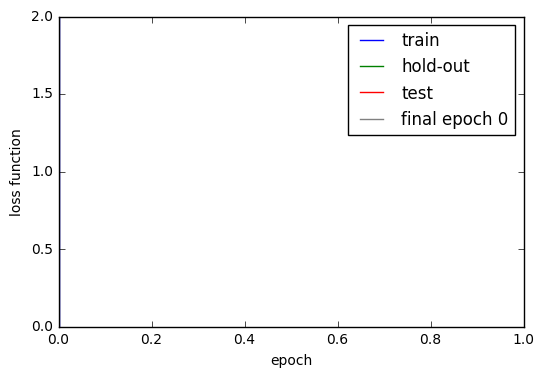

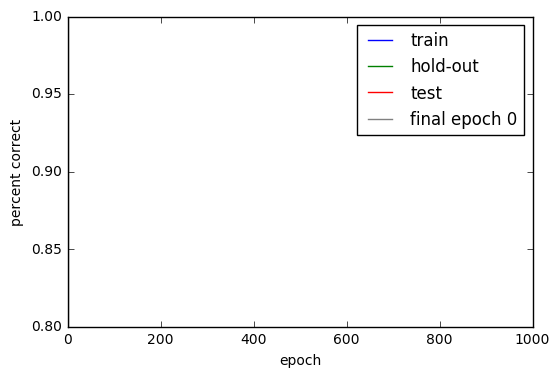

In [4]:
%%time
results = experiment(
    initial_rate=1e-7, T=420,
    lam=1e-3, regularization='L2',
    epoch_min=500, epoch_max=1000, early_stopping=3
)